In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\소상공인시장진흥공단_상가(상권)정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_강원_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_경기_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_경남_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_경북_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_광주_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_대구_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_대전_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_부산_202209.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소상공인시장진흥공단_상가(상권)정보\\소상공인시장진흥공단_상가(상권)정보_서울_202209.csv',
 

In [4]:
df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f,encoding='cp949')
    df = pd.concat([df,tmp_df])
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,"강원도 강릉시 가작로 270, (포남동)",210954.0,25488,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,"강원도 강릉시 창해로 307, (강문동)",210120.0,25467,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,"강원도 평창군 대관령면 오목길 107, (횡계리)",232954.0,25342,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,"강원도 강릉시 옥계면 헌화로 455-34, (금진리)",210831.0,25633,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,"강원도 원주시 송삼길 156-19, (무실동)",220150.0,26385,NaN,NaN,NaN,127.917307,37.327668


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446771 entries, 0 to 94171
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      int64  
 34  동정보        object 
 

In [6]:
df.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,호정보,경도,위도
count,2.446771e+06,2.446771e+06,2.446771e+06,2.446771e+06,2.446771e+06,2.446771e+06,2.446771e+06,2.446771e+06,1.871973e+06,2.446771e+06,2.446771e+06,484987.000000,2.437676e+06,2.446771e+06,0.0,2.446771e+06,2.446771e+06
mean,1.962996e+07,3.512172e+01,3.544736e+04,3.544789e+09,3.544751e+09,3.544751e+18,1.002162e+00,6.059861e+02,1.955641e+01,3.544770e+11,1.971815e+02,10.808407,4.505711e+05,3.039889e+04,NaN,1.275279e+02,3.652628e+01
std,4.460035e+06,1.224538e+01,1.221615e+04,1.221610e+09,1.221618e+09,1.221618e+18,4.644300e-02,6.334084e+02,6.630398e+01,1.221614e+11,4.861655e+02,17.231504,1.864902e+05,1.861129e+04,NaN,8.628000e-01,1.095368e+00
min,2.890151e+06,1.100000e+01,1.111000e+04,1.111052e+09,1.111010e+09,1.111010e+18,1.000000e+00,1.000000e+00,1.000000e+00,1.111020e+11,1.000000e+00,1.000000,1.000110e+05,1.000000e+03,NaN,1.246186e+02,3.311414e+01
25%,1.672822e+07,2.700000e+01,2.729000e+04,2.729062e+09,2.729012e+09,2.729012e+18,1.000000e+00,1.770000e+02,2.000000e+00,2.729042e+11,1.900000e+01,1.000000,3.360200e+05,1.359500e+04,NaN,1.269064e+02,3.555842e+01
50%,1.854454e+07,4.100000e+01,4.128700e+04,4.128754e+09,4.128710e+09,4.128710e+18,1.000000e+00,4.620000e+02,6.000000e+00,4.128732e+11,5.000000e+01,5.000000,4.489260e+05,2.848100e+04,NaN,1.271263e+02,3.683221e+01
75%,2.343131e+07,4.400000e+01,4.477000e+04,4.477039e+09,4.477039e+09,4.477039e+18,1.000000e+00,8.440000e+02,1.500000e+01,4.477046e+11,1.590000e+02,13.000000,6.098470e+05,4.770400e+04,NaN,1.283250e+02,3.749708e+01
max,2.852486e+07,5.000000e+01,5.013000e+04,5.013062e+09,5.013032e+09,5.013032e+18,2.000000e+00,9.999000e+03,3.784000e+03,5.013049e+11,9.503000e+03,900.000000,7.998230e+05,6.364400e+04,NaN,1.318656e+02,3.858465e+01


In [7]:
df.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보
count,2446770,378855,2446771,2446771,2446771,2446771,2446771,2446771,2269975,2269975,...,2446771,2446771,2446771,2446771,2446771,2446770,953339,2446771,280870,1121294
unique,1427320,125632,8,8,89,89,715,715,204,204,...,3164,3931,2,1028748,117230,1018303,174087,1019804,3320,321
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,중앙동,중동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 종로구 종로,2623010300105030015004104,현대아파트,"부산광역시 부산진구 가야대로 772, (부전동)",1,1
freq,11390,2831,823996,823996,311876,311876,215900,215900,378443,378443,...,43563,16374,2441482,1016,2263,1016,3826,1016,34042,667290


In [8]:
df.isnull().sum()

상가업소번호             0
상호명                1
지점명          2067916
상권업종대분류코드          0
상권업종대분류명           0
상권업종중분류코드          0
상권업종중분류명           0
상권업종소분류코드          0
상권업종소분류명           0
표준산업분류코드      176796
표준산업분류명       176796
시도코드               0
시도명                0
시군구코드              0
시군구명               0
행정동코드              0
행정동명               0
법정동코드              0
법정동명               0
지번코드               0
대지구분코드             0
대지구분명              0
지번본번지              0
지번부번지         574798
지번주소               0
도로명코드              0
도로명                0
건물본번지              0
건물부번지        1961784
건물관리번호             1
건물명          1493432
도로명주소              0
구우편번호           9095
신우편번호              0
동정보          2165901
층정보          1325477
호정보          2446771
경도                 0
위도                 0
dtype: int64

**상권업종 분류별 분포는?**

**시도별,시군구별 분포는?**

**시도별 top5 상권업종은?**

**대지구분,층정보 분포는?**

**대지구분별,층별 상권업종은?**

## 전처리

In [16]:
drop_cols = ['상권업종대분류코드','상권업종중분류코드','상권업종소분류코드','표준산업분류코드',
'시도코드','시군구코드','행정동코드','법정동코드','지번코드','대지구분코드','도로명코드','건물관리번호','구우편번호','신우편번호','호정보']
df.drop(drop_cols,axis=1,inplace=True)

In [22]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명         2067916
상권업종대분류명          0
상권업종중분류명          0
상권업종소분류명          0
표준산업분류명      176796
시도명               0
시군구명              0
행정동명              0
법정동명              0
대지구분명             0
지번본번지             0
지번부번지        574798
지번주소              0
도로명               0
건물본번지             0
건물부번지       1961784
건물명         1493432
도로명주소             0
동정보         2165901
층정보         1325477
경도                0
위도                0
dtype: int64

In [26]:
df[['지번부번지','건물부번지']] = df[['지번부번지','건물부번지']].fillna(0)
df = df.fillna('없음')

In [31]:
df['대지구분명'].unique()

array(['대지', '산'], dtype=object)

## 시각화

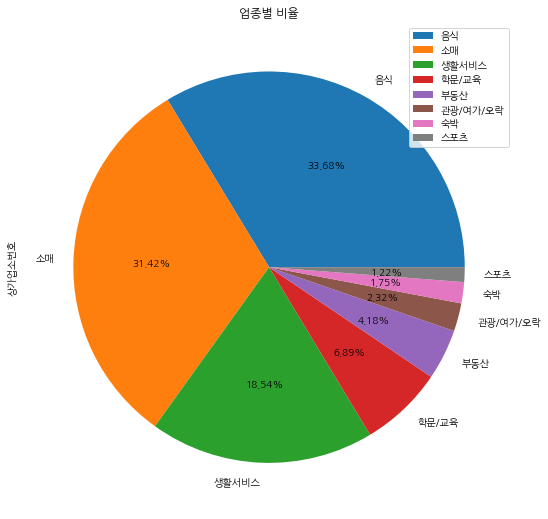

In [81]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('상권업종대분류명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
sub_df.plot.pie(y='상가업소번호',labels=sub_df['상권업종대분류명'].unique(),autopct='%.2f%%',ax=ax,title='업종별 비율')
type_list = sub_df['상권업종대분류명'].unique()

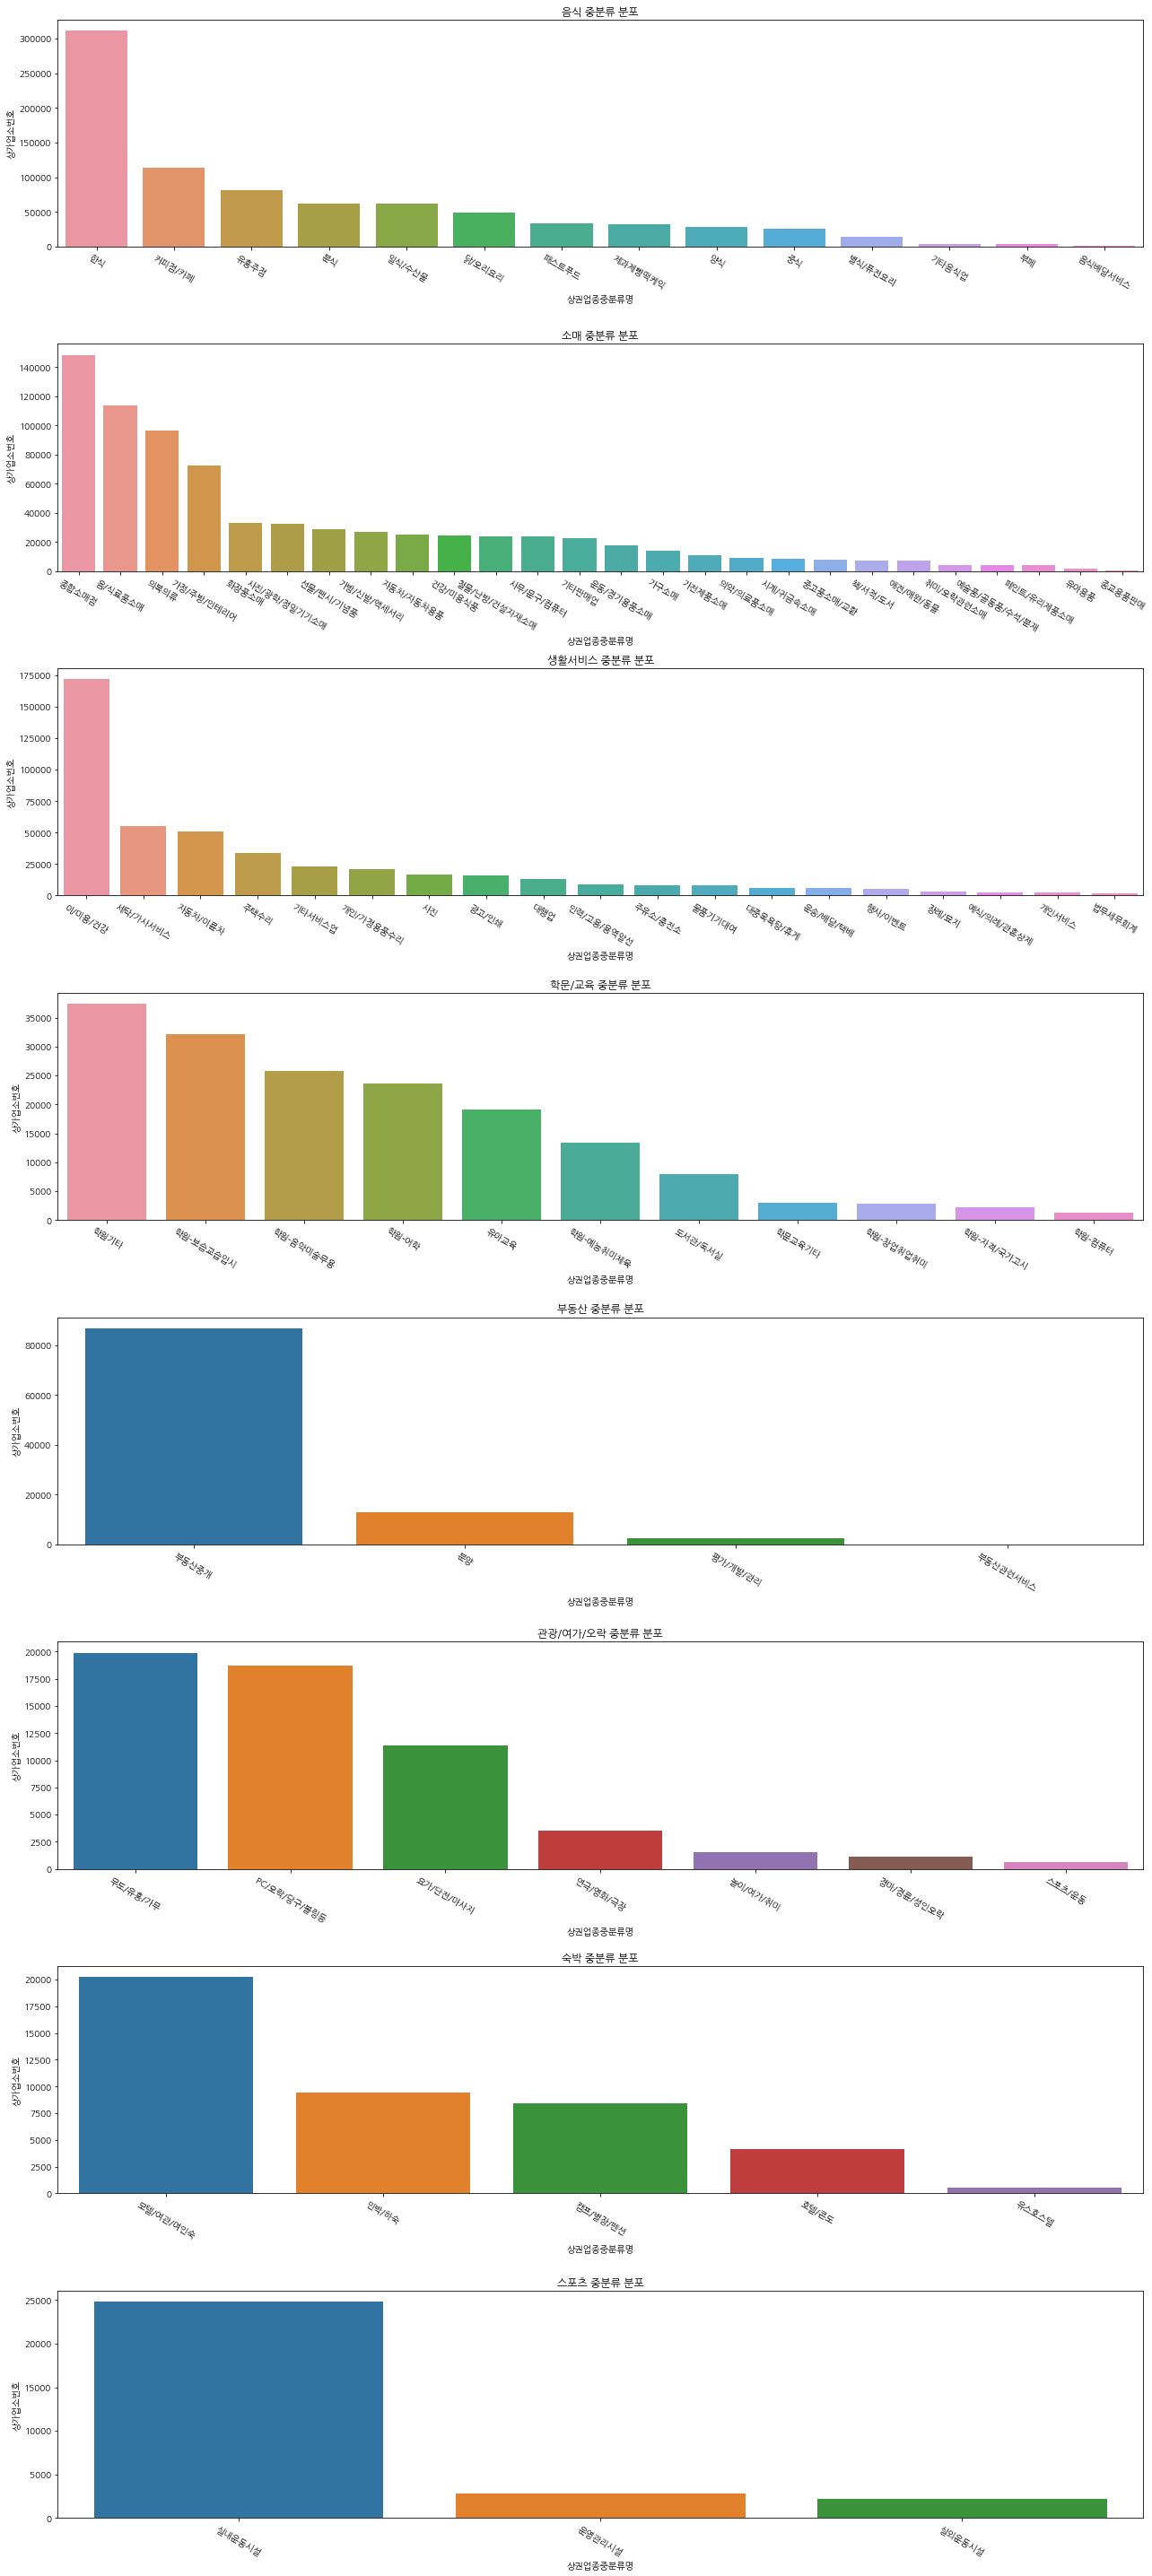

In [67]:
fig,axes = plt.subplots(8,1,figsize=(18,40))
for i,t in enumerate(type_list):
    sub_df = df[df['상권업종대분류명']==t].groupby('상권업종중분류명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
    g = sns.barplot(data=sub_df,x='상권업종중분류명',y='상가업소번호',ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=-30)
    axes[i].set_title(f'{t} 중분류 분포')
plt.tight_layout()

<AxesSubplot: title={'center': '시도별 비율'}, ylabel='상가업소번호'>

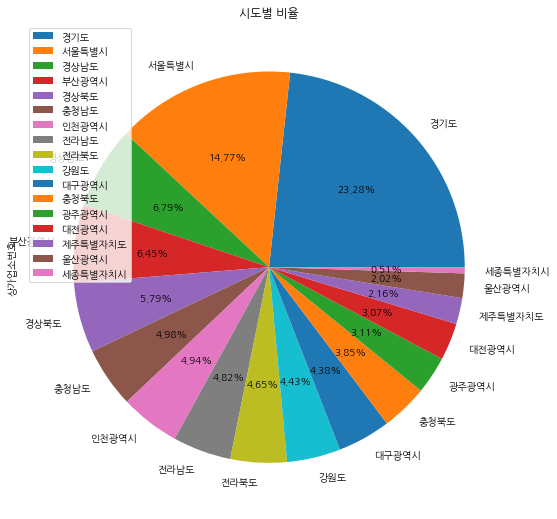

In [80]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('시도명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
sub_df.plot.pie(y='상가업소번호',labels=sub_df['시도명'].unique(),autopct='%.2f%%',ax=ax,title='시도별 비율')

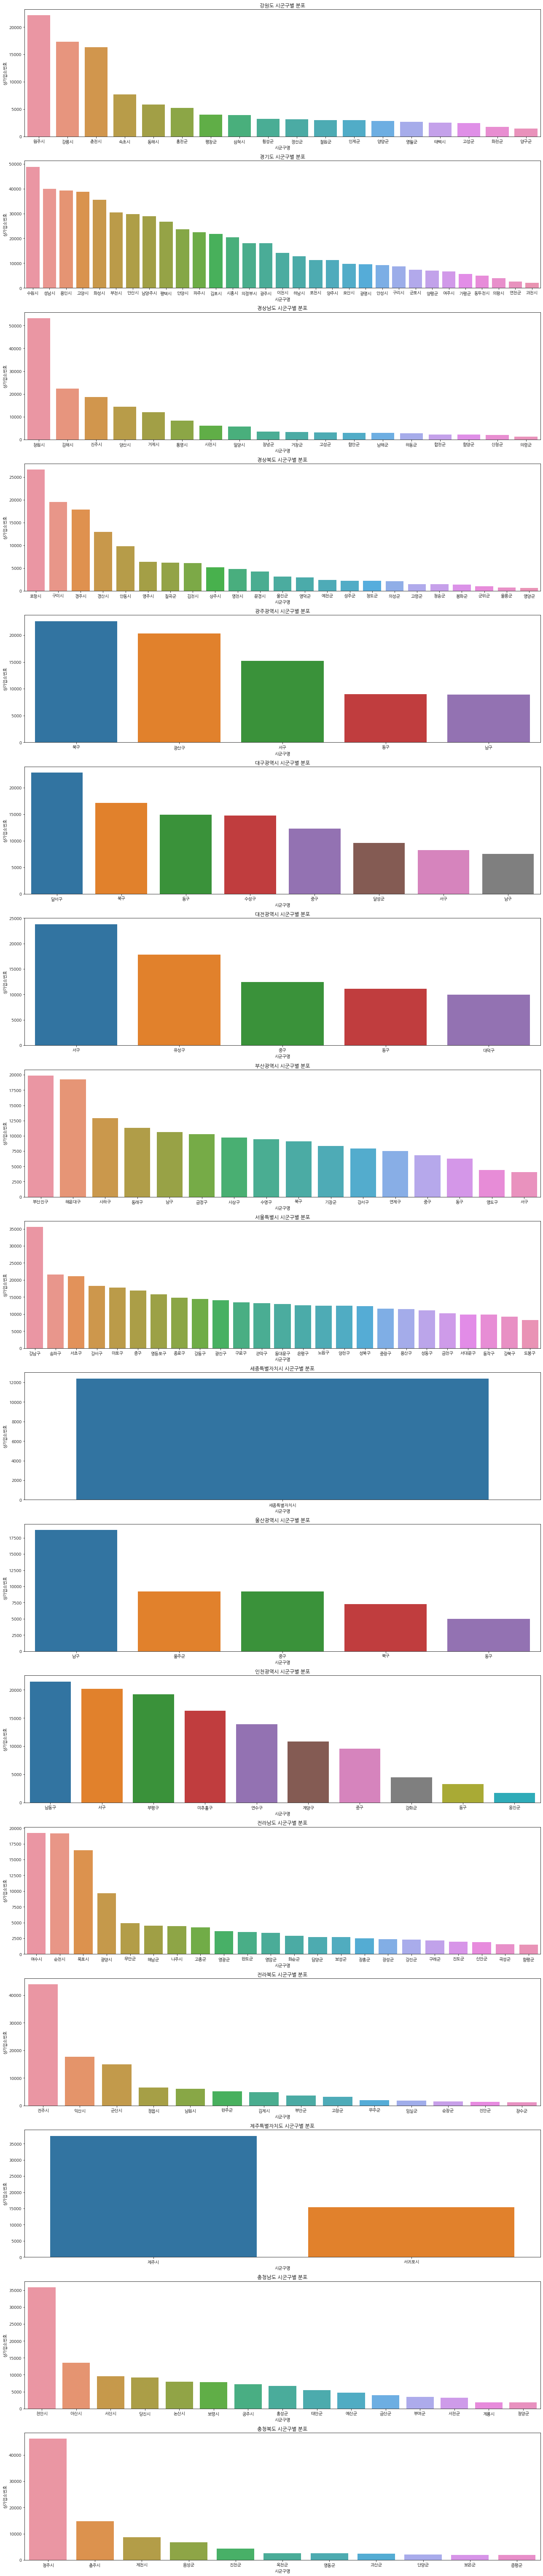

In [60]:
city_list = df['시도명'].unique()
fig,axes = plt.subplots(len(city_list),figsize=(18,len(city_list)*5))
for i,c in enumerate(city_list):
    sub_df = df[df['시도명']==c].groupby('시군구명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
    sns.barplot(data=sub_df,x='시군구명',y='상가업소번호',ax=axes[i]).set(title=f'{c} 시군구별 분포')
plt.tight_layout()

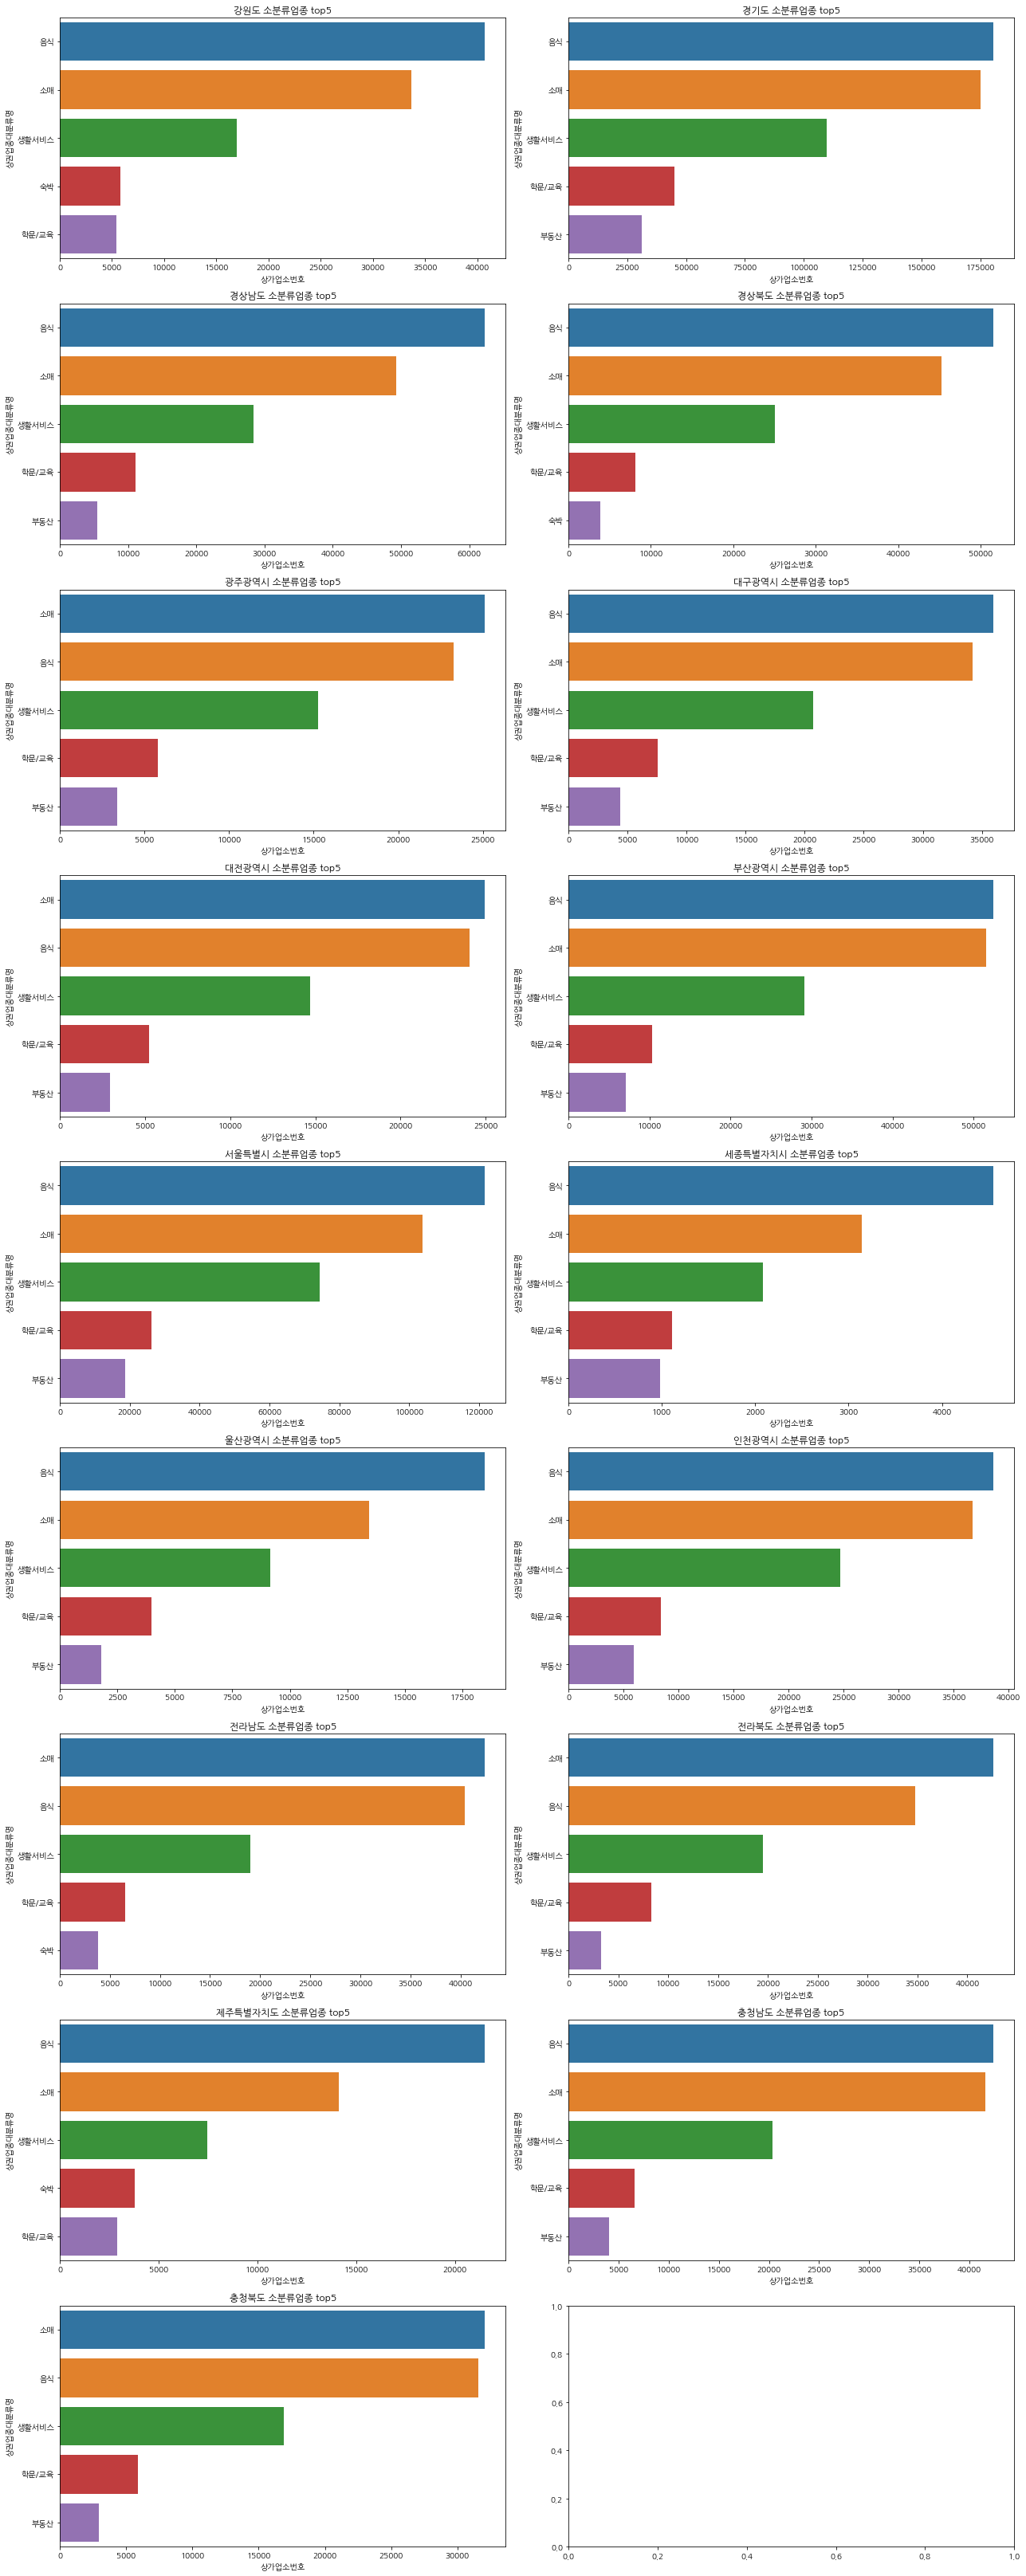

In [89]:
city_list = df['시도명'].unique()
fig,axes = plt.subplots(9,2,figsize=(18,45))
for i,c in enumerate(city_list):
    sub_df = df[df['시도명']==c].groupby('상권업종대분류명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
    sns.barplot(data=sub_df.head(),y='상권업종대분류명',x='상가업소번호',ax=axes[i//2][i%2]).set(title=f'{c} 소분류업종 top5')
plt.tight_layout()

<AxesSubplot: title={'center': '대지구분별 비율'}, ylabel='상가업소번호'>

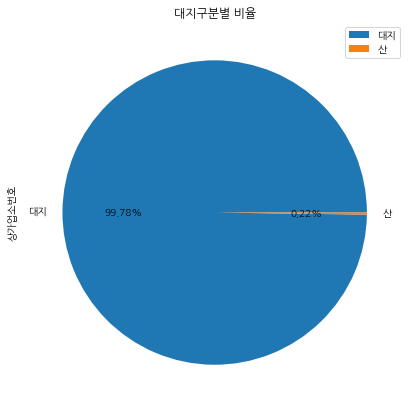

In [74]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sub_df = df.groupby('대지구분명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
sub_df.plot.pie(y='상가업소번호',labels=df['대지구분명'].unique(),autopct='%.2f%%',ax=ax,title='대지구분별 비율')

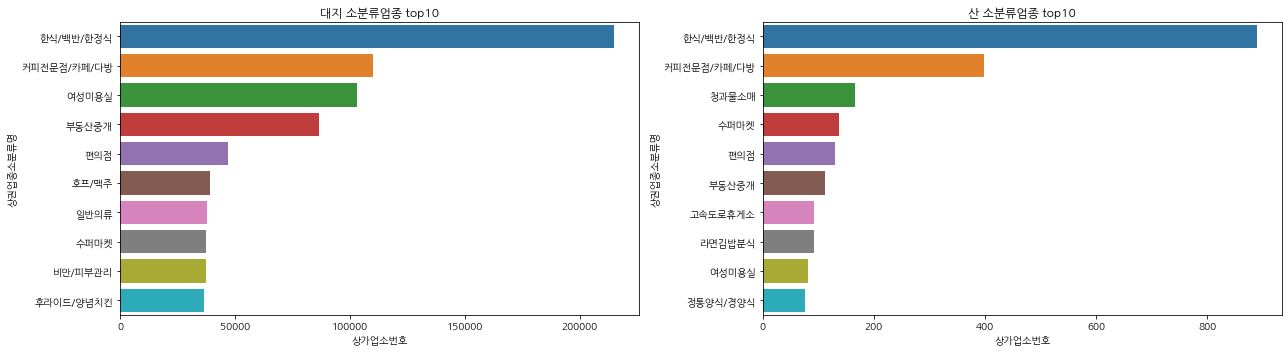

In [84]:
area_list = df['대지구분명'].unique()
fig,axes = plt.subplots(1,2,figsize=(18,5))
for i,c in enumerate(city_list):
    sub_df = df[df['대지구분명']==c].groupby('상권업종소분류명',as_index=False)['상가업소번호'].count().sort_values('상가업소번호',ascending=False)
    sns.barplot(data=sub_df.head(10),y='상권업종소분류명',x='상가업소번호',ax=axes[i]).set(title=f'{c} 소분류업종 top10')
plt.tight_layout()